In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import re
import contractions
from spellchecker import SpellChecker

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sata\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sata\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sata\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sata\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
df = pd.read_csv('Mental-Health-Twitterr.csv')
df

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets
0,0,6.380000e+17,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1.013187e+09,84,211,251,837,0
1,1,6.380000e+17,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1.013187e+09,84,211,251,837,1
2,2,6.380000e+17,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1.013187e+09,84,211,251,837,0
3,3,6.380000e+17,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1.013187e+09,84,211,251,837,2
4,4,6.380000e+17,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1.013187e+09,84,211,251,837,1
...,...,...,...,...,...,...,...,...,...,...
19995,19995,8.190000e+17,Thu Jan 12 00:14:56 +0000 2017,A day without sunshine is like night.,1.169876e+09,442,230,7,1063601,0
19996,19996,8.190000e+17,Thu Jan 12 00:06:18 +0000 2017,"Boren's Laws: (1) When in charge, ponder. (2) ...",1.169876e+09,442,230,7,1063601,0
19997,19997,8.190000e+17,Thu Jan 12 00:05:42 +0000 2017,The flow chart is a most thoroughly oversold p...,1.169876e+09,442,230,7,1063601,0
19998,19998,8.190000e+17,Thu Jan 12 00:05:22 +0000 2017,"Ships are safe in harbor, but they were never ...",1.169876e+09,442,230,7,1063601,0


In [5]:
df=df["post_text"]
df.head()


0    It's just over 2 years since I was diagnosed w...
1    It's Sunday, I need a break, so I'm planning t...
2    Awake but tired. I need to sleep but my brain ...
3    RT @SewHQ: #Retro bears make perfect gifts and...
4    It’s hard to say whether packing lists are mak...
Name: post_text, dtype: object

In [6]:
df.isnull().sum()

0

# Text preprocessing


In [7]:
# Convert tweets characters to lowercase
df = df.str.lower()
#expands shortened words
df = df.apply(lambda x: contractions.fix(x))

# Remove numbers from tweets as they do not indicate anything
df = df.str.replace('\d+', '', regex=True)

# Remove punctuation from tweets
df = df.str.replace("[^\w\s]", "", regex=True)

# Remove URLs from tweets
df = df.str.replace(r"http\S+|www\S+|https\S+", "", regex=True)
    
df.head()

0    it is just over  years since i was diagnosed w...
1    it is sunday i need a break so i am planning t...
2    awake but tired i need to sleep but my brain h...
3    rt sewhq retro bears make perfect gifts and ar...
4    it is hard to say whether packing lists are ma...
Name: post_text, dtype: object

In [8]:
def remove_stopwords_and_lemmatize(tweets):
    filtered_tokens = []
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(tweets)
    for tweet in tokens:
        if tweet not in stop_words:
            lemmatized_word = lemmatizer.lemmatize(tweet)
            filtered_tokens.append(lemmatized_word)
#     filtered_text = ' '.join(filtered_tokens)
#     Return the filtered text
    return filtered_tokens
        
df=df.apply(remove_stopwords_and_lemmatize)    
    
df.head()

0    [year, since, diagnosed, anxiety, depression, ...
1    [sunday, need, break, planning, spend, little,...
2             [awake, tired, need, sleep, brain, idea]
3    [rt, sewhq, retro, bear, make, perfect, gift, ...
4    [hard, say, whether, packing, list, making, li...
Name: post_text, dtype: object

In [9]:
def correct_spelling(word_list):
    spell = SpellChecker()
    corrected_list = []
    for word in word_list:
        corrected_word = spell.correction(word)
        corrected_list.append(corrected_word)
    return corrected_list

df=df.apply(correct_spelling)    
    
df.head()

0    [year, since, diagnosed, anxiety, depression, ...
1    [sunday, need, break, planning, spend, little,...
2             [awake, tired, need, sleep, brain, idea]
3    [it, sew, retro, bear, make, perfect, gift, gr...
4    [hard, say, whether, packing, list, making, li...
Name: post_text, dtype: object

# Analysis


In [26]:
 df=pd.DataFrame(df)

In [29]:
#classify the tweets based on it's polarity to depressed'1' or not '0' 
def classify_sentiment(word_list):
    polarity = 0
    text = ' '.join(str(word) for word in word_list)  # Join the list of words into a single string
    blob = TextBlob(text)
    polarity += blob.sentiment.polarity
    if polarity > .1:
        return 0
    else:
        return 1
# Apply sentiment classification to the 'text' column in the DataFrame
df['sentiment']=df['post_text'].apply(classify_sentiment)
labels=df['sentiment'].value_counts()
labels

df



C:\Users\sata\AppData\Local\Temp\ipykernel_5260\1560306791.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment']=df['post_text'].apply(classify_sentiment)


,post_text,sentiment
0,"[year, since, diagnosed, anxiety, depression, ...",1
1,"[sunday, need, break, planning, spend, little,...",1
2,"[awake, tired, need, sleep, brain, idea]",1
3,"[it, sew, retro, bear, make, perfect, gift, gr...",0
4,"[hard, say, whether, packing, list, making, li...",1
...,...,...
19995,"[day, without, sunshine, like, night]",1
19996,"[bores, law, charge, ponder, trouble, delegate...",1
19997,"[flow, chart, thoroughly, oversold, piece, pro...",1
19998,"[ship, safe, harbor, never, meant, stay]",0


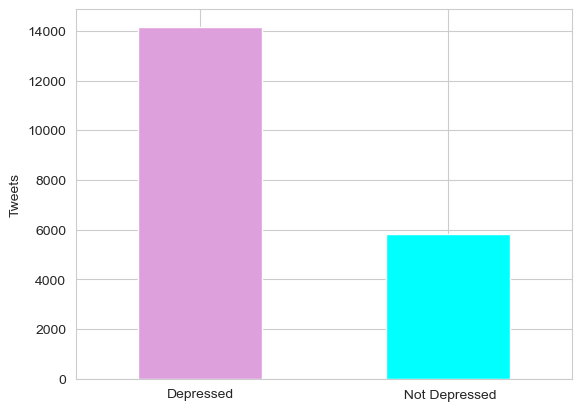

,post_text,sentiment
0,"[year, since, diagnosed, anxiety, depression, ...",1
1,"[sunday, need, break, planning, spend, little,...",1
2,"[awake, tired, need, sleep, brain, idea]",1
3,"[it, sew, retro, bear, make, perfect, gift, gr...",0
4,"[hard, say, whether, packing, list, making, li...",1
...,...,...
19995,"[day, without, sunshine, like, night]",1
19996,"[bores, law, charge, ponder, trouble, delegate...",1
19997,"[flow, chart, thoroughly, oversold, piece, pro...",1
19998,"[ship, safe, harbor, never, meant, stay]",0


In [30]:

sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)

# Assign the categorical labels directly
labels.index = ['Depressed', ' Not Depressed']

# Create the bar plot
labels.plot(kind="bar", rot=0, color=["plum", "cyan"])

# Set the y-axis label
plt.ylabel("Tweets")

# Display the plot
plt.show()
pd.DataFrame(df)

# splitting data

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['post_text'], df['sentiment'], test_size=0.25, random_state=42)
X_train = [' '.join(filter(None, doc)) for doc in X_train]
X_test = [' '.join(filter(None, doc)) for doc in X_test]

type(X_train)

list

 # Convert the text data into numerical data

In [116]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(ngram_range=(1,1),max_features=2000) #
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [117]:
from sklearn.model_selection import GridSearchCV

#selecting best alpha( laplace smoothing factor for naive bayes)

param={'alpha': [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]}
nb = MultinomialNB()
clf=GridSearchCV(nb,param,scoring='roc_auc',cv=10,return_train_score=True)
clf.fit(X_train,y_train)
clf.best_params_


{'alpha': 1}

# Train model (naive bayes)

Accuracy: 0.897
quantative_predictions : [0 1 0 1 1 1 1 1 0 1]
qualitative_predictions : ['normal', 'depressed', 'normal', 'depressed', 'depressed', 'depressed', 'depressed', 'depressed', 'normal', 'depressed']


C:\Users\sata\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


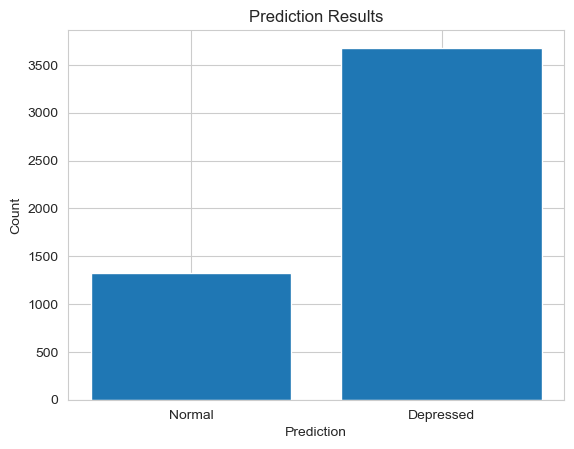

In [118]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb = MultinomialNB(alpha=1)
nb.fit(X_train, y_train)
sample_texts = [' not depressed', 'depressed',]
# Make predictions on the test data
y_pred = nb.predict(X_test)
# Create a list to store qualitative predictions
qualitative_predictions = []

# Map predicted labels to qualitative interpretations
for pred in y_pred:
    if pred == 0:
        qualitative_predictions.append('normal')

    else :
        qualitative_predictions.append('depressed')


# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
#print results of random 10 test data
print("quantative_predictions :",y_pred[10:20])
print("qualitative_predictions :",qualitative_predictions[10:20])

# Plotting the quantitative results
normal_count = np.count_nonzero(y_pred == 0)
depressed_count = np.count_nonzero(y_pred == 1)
labels = ['Normal', 'Depressed']

counts = [normal_count, depressed_count]

plt.bar(labels, counts)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Prediction Results')

plt.show()

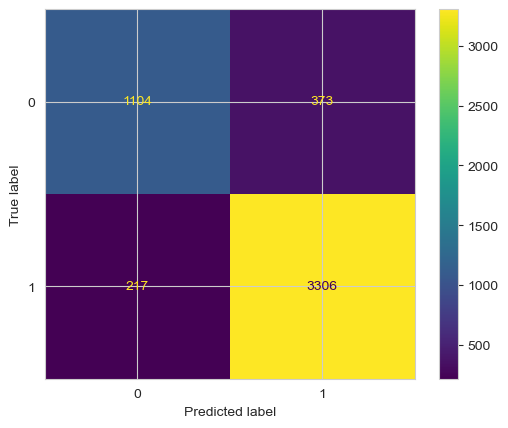

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, nb.predict(X_test))
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)
cm.plot()

# trying random sentences 

In [38]:

y_pred = nb.predict(vectorizer.transform([' love  to hate myself']))
print("depressed",y_pred)
y_pred = nb.predict(vectorizer.transform([' love  myself']))
print("Normal",y_pred)


depressed [1]
Normal [0]


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, param_grid, scoring='accuracy')

grid_search.fit(X_train,y_train)
grid_search.best_params_

# random forest


In [125]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=None,min_samples_leaf=1,min_samples_split=2)
rf.fit(X_train, y_train)
accuracy = rf.score(X_test, y_test)
print('Accuracy:', accuracy)


Accuracy: 0.9212


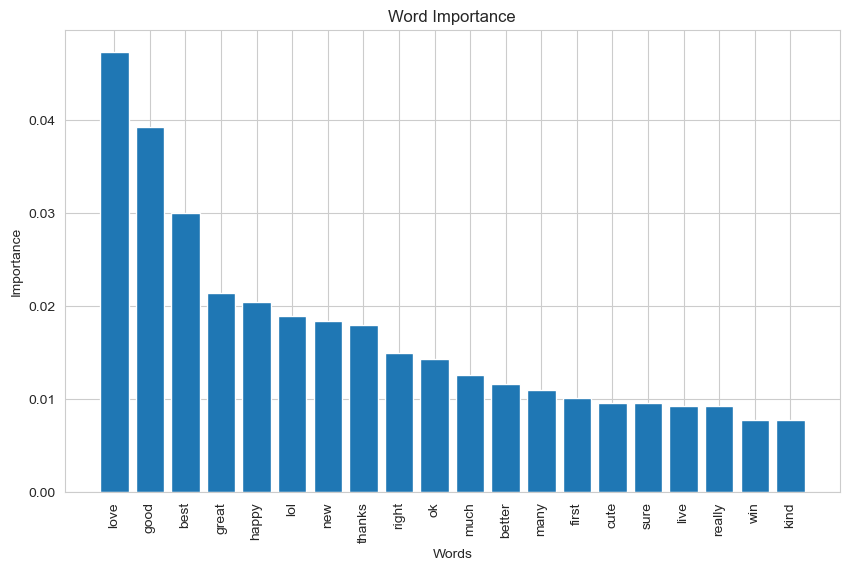

In [126]:
importances = rf.feature_importances_
feature_names = vectorizer.get_feature_names_out()  

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(range(20), importances[indices[:20]], align='center')
plt.xticks(range(20), np.array(feature_names)[indices[:20]], rotation=90)
plt.title('Word Importance')
plt.xlabel('Words')
plt.ylabel('Importance')
plt.show()

quantative_predictions : [0 1 0 1 1 1 1 0 0 1]
qualitative_predictions : ['normal', 'depressed', 'normal', 'depressed', 'depressed', 'depressed', 'depressed', 'normal', 'normal', 'depressed']


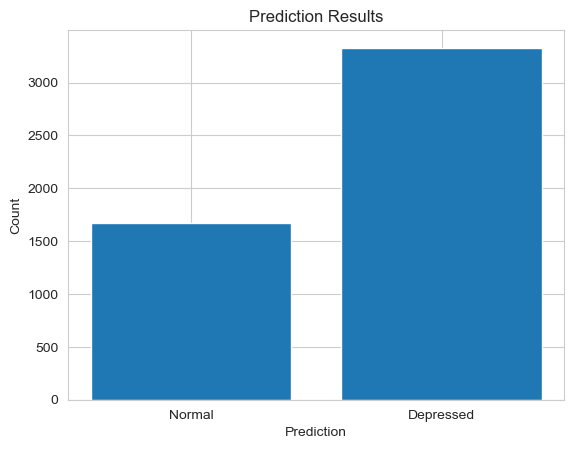

In [127]:
prediction = rf.predict(X_test)

qualitative_predictions2 = []

# Map predicted labels to qualitative interpretations
for pred in prediction:
    if pred == 0:
        qualitative_predictions2.append('normal')

    else :
        qualitative_predictions2.append('depressed')
#random 10 samples
print("quantative_predictions :",prediction[10:20])
print("qualitative_predictions :",qualitative_predictions2[10:20])

# Plotting the quantitative results
normal_count = np.count_nonzero(prediction == 0)
depressed_count = np.count_nonzero(prediction == 1)
labels = ['Normal', 'Depressed']

counts = [normal_count, depressed_count]

plt.bar(labels, counts)
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Prediction Results')

plt.show()

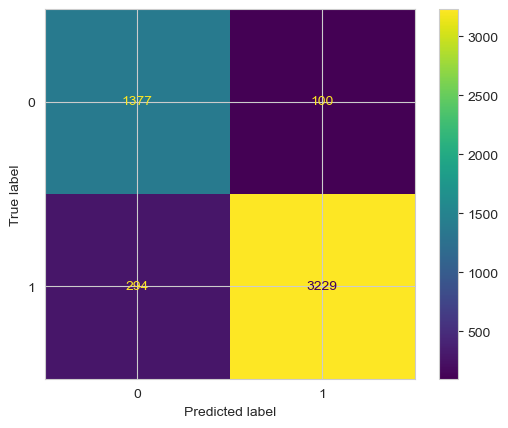

In [128]:
cm2 = confusion_matrix(y_test, rf.predict(X_test))
cm2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=rf.classes_)
cm2.plot()